In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



In [6]:
# Dataset was loaded from the downloaded CSV file.

try:
    df = pd.read_csv('./Life Expectancy Data.csv')
except:
    from google.colab import drive
    drive.mount('/content/drive/')
    df_train = pd.read_csv('/content/drive/My Drive/MachineLearningGroupProject/training data.csv')
    df_test = pd.read_csv('/content/drive/My Drive/MachineLearningGroupProject/testing data.csv')
    df = pd.concat([df_train, df_test], ignore_index=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Section 1: Data Definition

In [8]:
# Dataset Description
# This dataset is comprised of data from all over the world from various countries aggregated by the World Health
# Organization (WHO for short). The data is an aggregate of many indicators for a particular country in a particular year.
# In essence, the data is multiple indicators in a time series separated by country.

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
# Before getting into the variable descriptions, the column header values have spaces so the following is a quick cleaning
# of the column/variable titles.

In [11]:
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [12]:
# Variable Descriptions
# Format: variable (type) - description

# country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)

# year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

# status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

# life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year. The is considered to
# be the dependent variable - The predictor or the traget varibale

# adult_mortality (Ratio) - the adult mortality rate per 1000 population (number of people dying between 15 and 60 years
# per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60;
# another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

# infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

# alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
# percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

# hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

# measles (Ratio) - number of reported Measles cases per 1000 population

# bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

# under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

# polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

# total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

# diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

# hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die
# due to HIV/AIDS per 1000 births

# gdp (Ratio) - Gross Domestic Product per capita

# population (Ratio) - population of the country

# thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to
# thinness_10-19_years to more accurately represent the variable)

# thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

# income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources
# (index ranging from 0 to 1)

# schooling (Ratio) - average number of years of schooling of a population


In [13]:
# As stated above it would be useful to change the name of the variable thinness_1-19_years to thinness_10-19_years as it
# is a more accurate depiction of what the variable means.

df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [14]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

### Section 2: Data Cleaning

In [16]:
# The quickest method here would be to do a df.describe() and look at each variable on
# its own to see if the values make sense given the description of the variable.

In [17]:
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [18]:
# Few things noted here.

# Adult mortality of 1? This is likely an error in measurement, but what values make sense here? May need to change to null
# if under a certain threshold.

# Infant deaths as low as 0 per 1000? That just isn't plausible - I'm deeming those values to actually be null. Also on
# the other end 1800 is likely an outlier, but it is possible in a country with very high birthrates and perhaps a not very
# high population total - this can be dealt with later.

# BMI of 1 and 87.3? Pretty sure the whole population would not exist if that were the case. A BMI of 15 or lower is
# seriously underweight and a BMI of 40 or higher is morbidly obese, therefore a large number of these measurements just
# seem unrealistic..this variable might not be worth digging into at all.

# Under Five Deaths, similar to infant deaths just isn't likely (perhaps even impossible) to have values at zero.

# GDP per capita as low as 1.68 (USD) possible? Doubtful - but perhaps values this low are outliers.

# Population of 34 for an entire country? This is unrealistics for a country like Maldives.

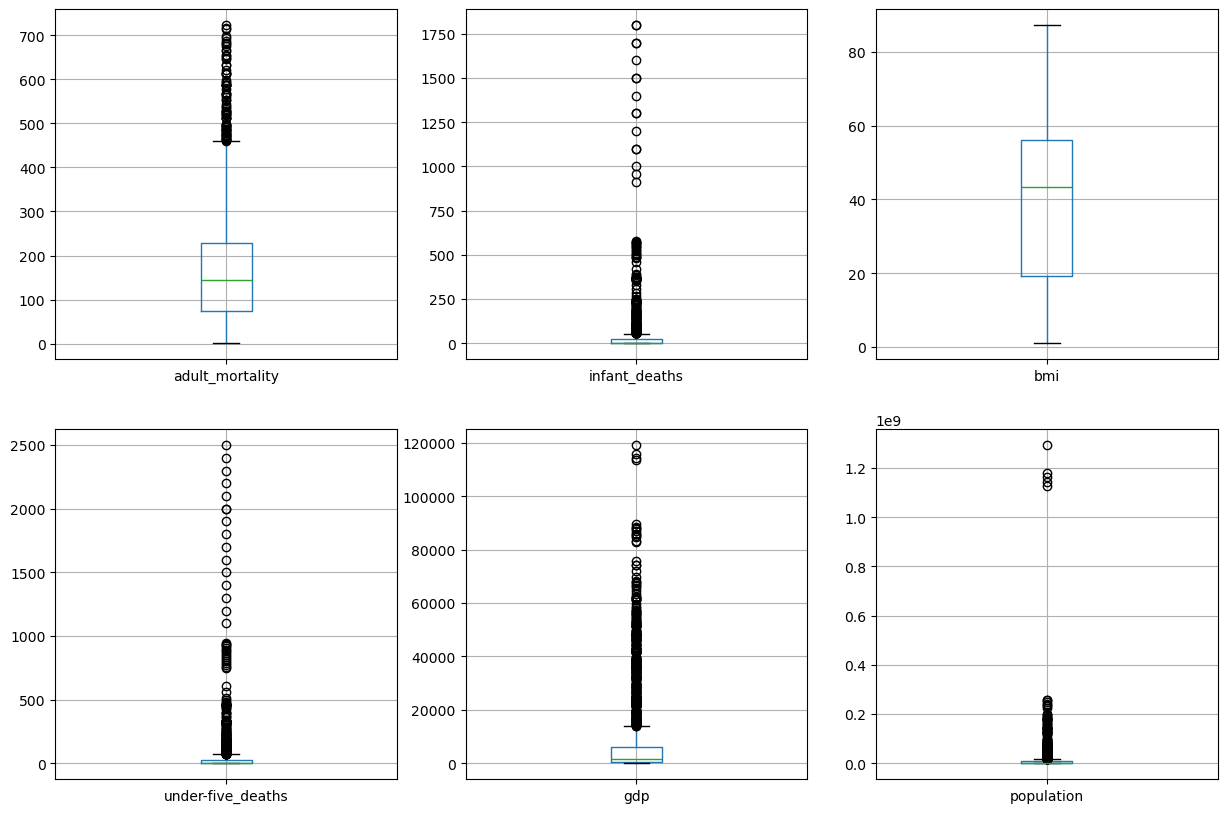

In [19]:
# Lets see the outliers.

plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

In [20]:
# There are a few of the above that could simply be outliers, but there are some that almost certainly have to be errors
# of some sort. Of the above variables, changes to null will be made for the following since these numbers don't make any
# sense:

# Adult mortality rates lower than the 5th percentile
# Infant deaths of 0
# BMI less than 10 and greater than 50
# Under Five deaths of 0

In [21]:
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

In [22]:
# Check missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2783 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              1482 non-null   float64
 11  under-five_deaths                2153 non-null   float64
 12  polio               

In [23]:
# It appears that there are a decent amount of null values, may be of more use to break down the data into those that
# contain nulls in order to take a closer look. The function below attempts to do just that - it only returns the columns
# that contain (explicit) nulls, keeps a running total of those columns with nulls as well as their location in the
# dataframe, returns the count of nulls in a specified column and the percent of nulls out of all the values in the column.

In [24]:
def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [25]:
nulls_breakdown()

[iloc = 3] life_expectancy has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 155 null values: 5.28% null
[iloc = 5] infant_deaths has 848 null values: 28.86% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 1456 null values: 49.56% null
[iloc = 11] under-five_deaths has 785 null values: 26.72% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness_10-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null val

In [26]:
# Dealing with Missing Values

In [27]:
# Nearly half of the BMI variable's values are null, it is likely best to remove this variable altogether.

In [28]:
df.drop(columns='bmi', inplace=True)

In [29]:
# There are a lot of columns containing null values, since this is time series data assorted by country, the best course
# of action would be to interpolate the data by country. However, when attempting to interpolate by country it doesn't fill
# in any values as the countries' data for all the null values are null for each year, therefore imputation by year may be
# the best possible method here. Imputation of each year's mean is done below.

In [30]:
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [31]:
nulls_breakdown(df)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


In [32]:
# It appears that this method took care of the null values. Hopefully meaningful results can still be garnered using this
# imputation method. Let's look at the outliers.

In [33]:
# Let's do a boxplot and histogram for each continuous variable in order to visually see if outliers exist.

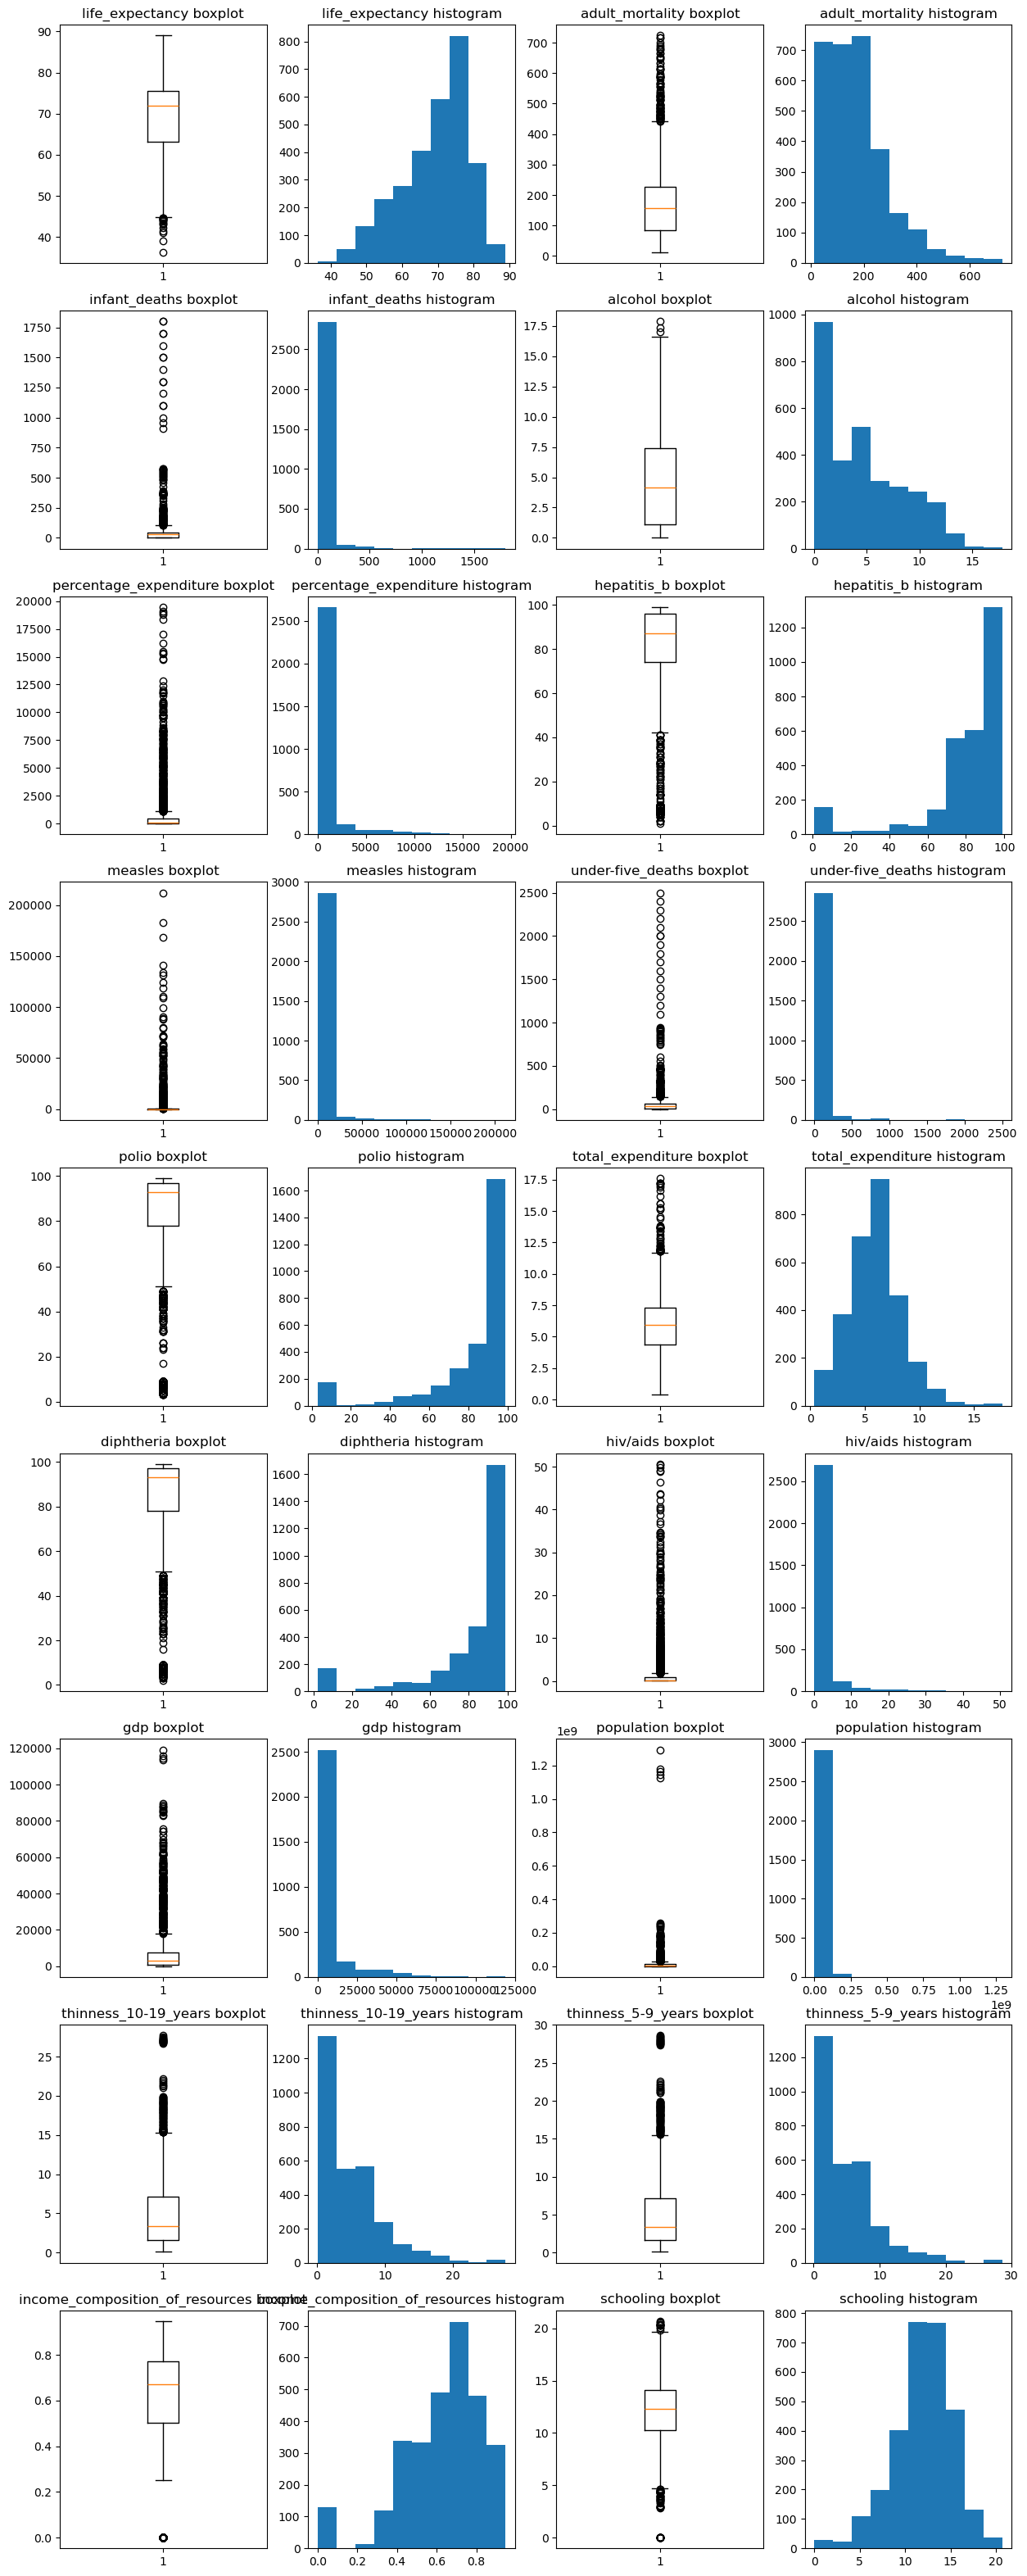

In [34]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

In [35]:
# Visually, it is seen that there are a number of outliers for all of these variables - including the target variable,
# life expectancy. The same will be done statistically using Tukey's method below - outliers being considered anything
# outside of 1.5 times the IQR.

In [36]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [37]:
for col in cont_vars:
    outlier_count(col)

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 97
Percent of data that is outlier: 3.3%
---------------infant_deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 222
Percent of data that is outlier: 7.56%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------polio---------------
Number of outliers: 279
Percent of data that is outlier: 9.5%
---------------total_expenditure---------------

In [38]:
# Since each variable has a unique amount of outliers and also has outliers on different sides of the data, the best route
# to take is probably winsorizing (limiting) the values for each variable on its own until no outliers remain.

In [39]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

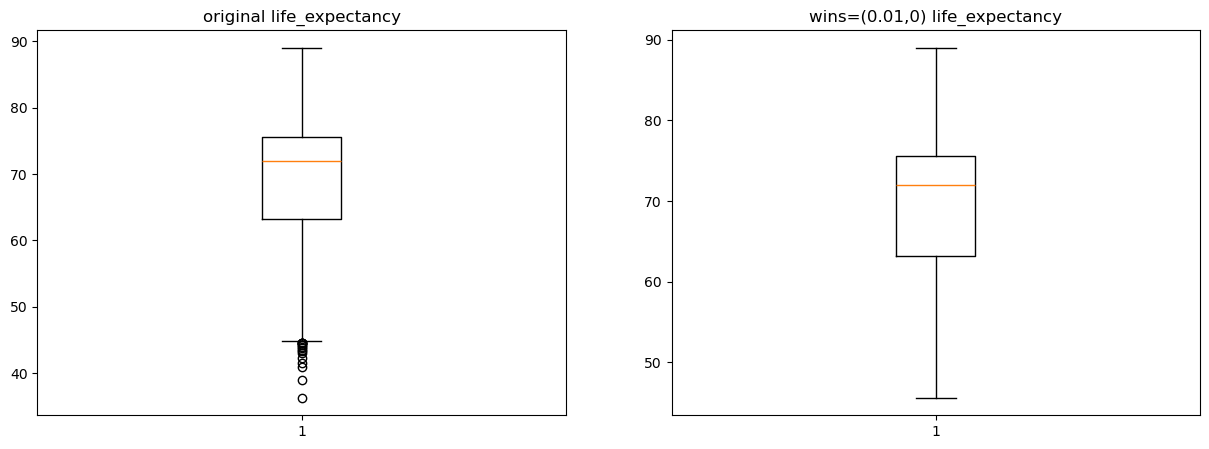

In [40]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

In [41]:
# The plot above is an example of how the winsorization is visually inspected (the rest are not shown for brevity).

In [42]:
# All the variables have now been winsorized as little as possible in order to keep as much data in tact as possible while
# still being able to eliminate the outliers. Finally, small boxplots will be shown for each variable's winsorized data to
# show that the outliers have indeed been dealt with.

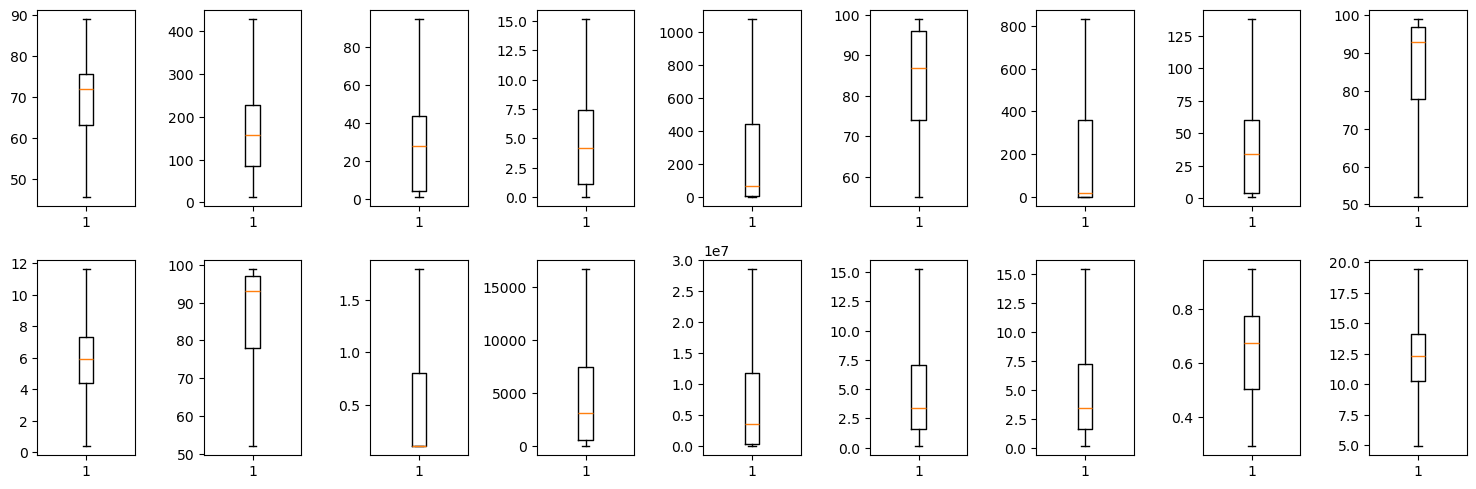

In [43]:
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

In [44]:
# Now that the outliers have been dealt with, the data cleaning section is complete.
# Let's check the status of nulls and other statistics of df.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   float64
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  under-five_deaths                2938 non-null   float64
 11  polio                            2938 non-null   float64
 12  total_expenditure        

In [45]:
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.231777,172.924761,42.458242,4.644013,738.251295,80.322757,2419.592240,57.191600,82.536808,6.007815,82.305166,1.742103,7481.955600,1.275499e+07,4.839464,4.870027,0.627686,11.993407
std,9.508362,118.847313,116.366814,3.919849,1987.914858,22.682329,11467.272489,158.481956,23.353973,2.416215,23.642961,5.077785,13159.210856,5.384718e+07,4.394616,4.482803,0.205212,3.268724
min,36.300000,13.000000,1.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.200000,84.000000,4.000000,1.092500,4.685343,74.099237,0.000000,4.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,72.000000,157.000000,28.000000,4.140000,64.912906,87.000000,17.000000,34.000000,93.000000,5.910000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.673000,12.300000
75%,75.600000,227.000000,43.766917,7.390000,441.534144,96.000000,360.250000,60.014815,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.100000,7.200000,0.772000,14.100000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Section 3: Data Exploration

In [47]:
# Before diving into exploration, a new dataframe with the winsorized data should be created.

In [48]:
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

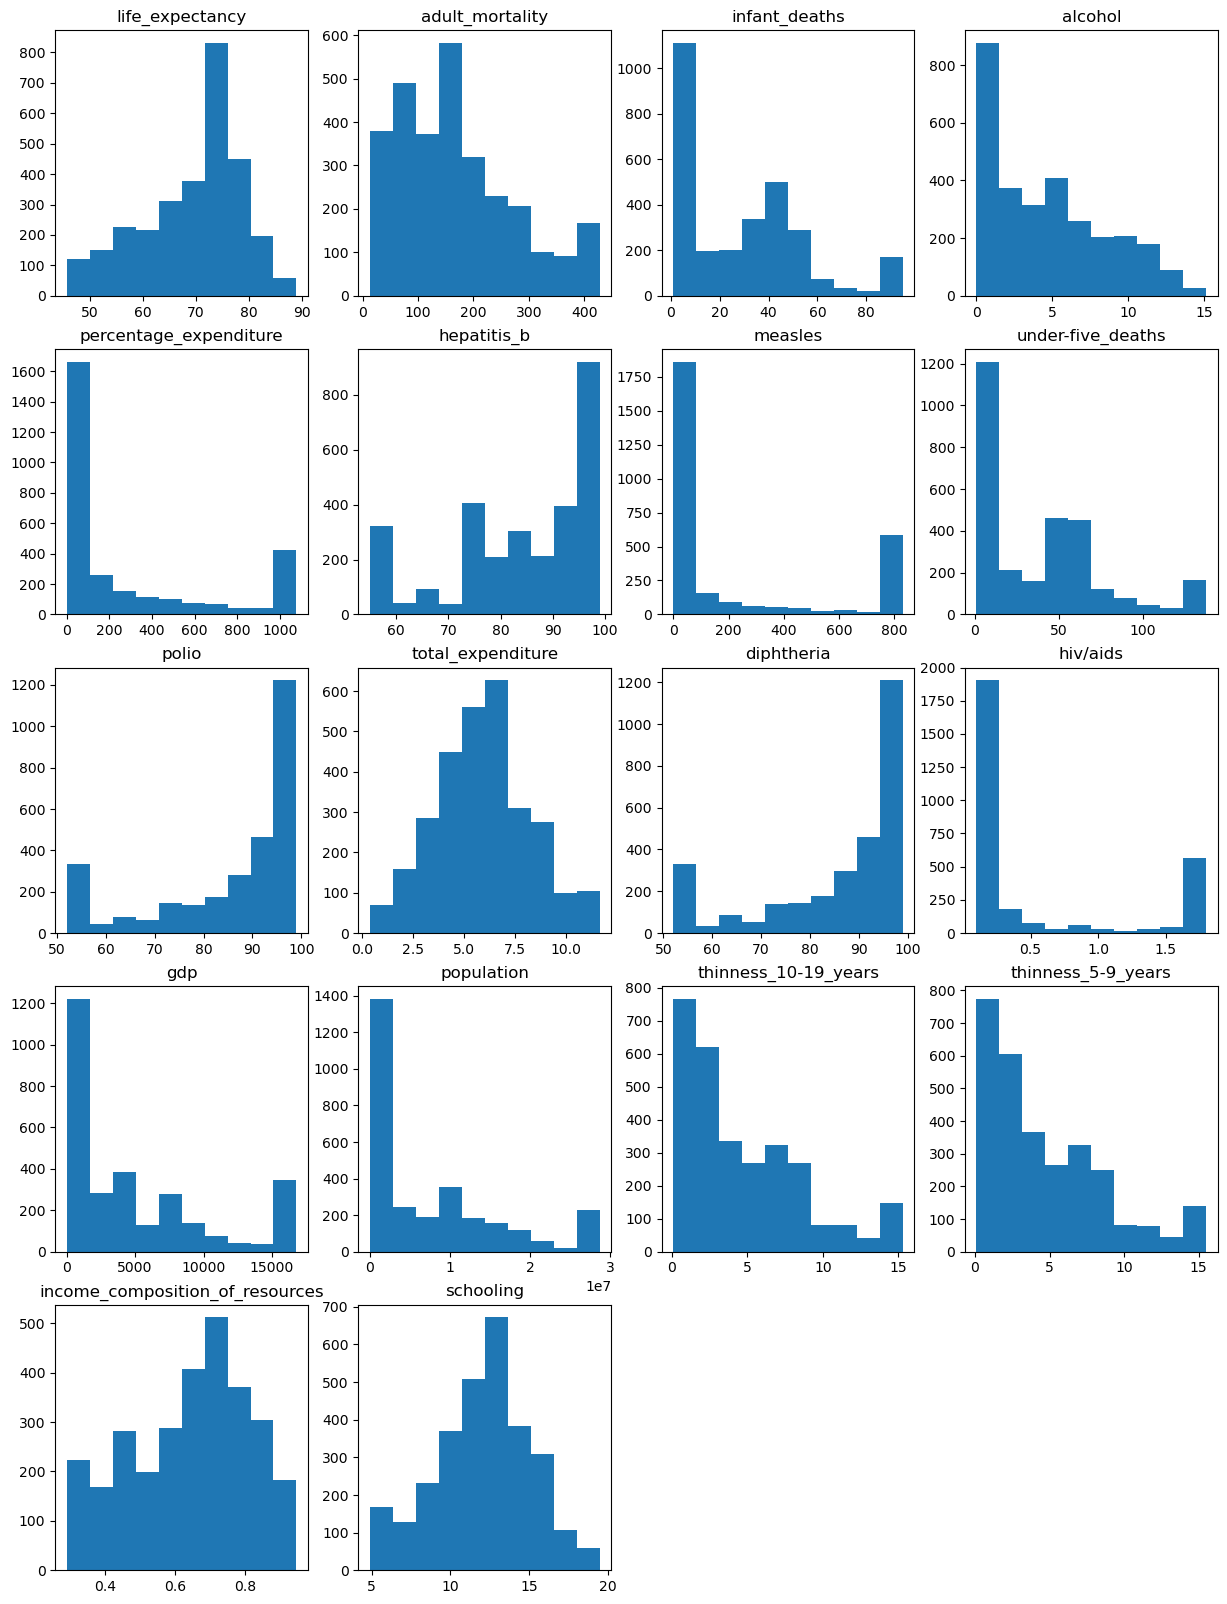

In [49]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col])
    plt.title(col)

In [50]:
# The winsorization had a large effect on some variables while not having too much of an effect on others. Even though
# all of these variables were winsorized in some fashion, some variables are much more obviously winsorized than others.

In [51]:
# Now let's see the distrubution of the catergorical variables.

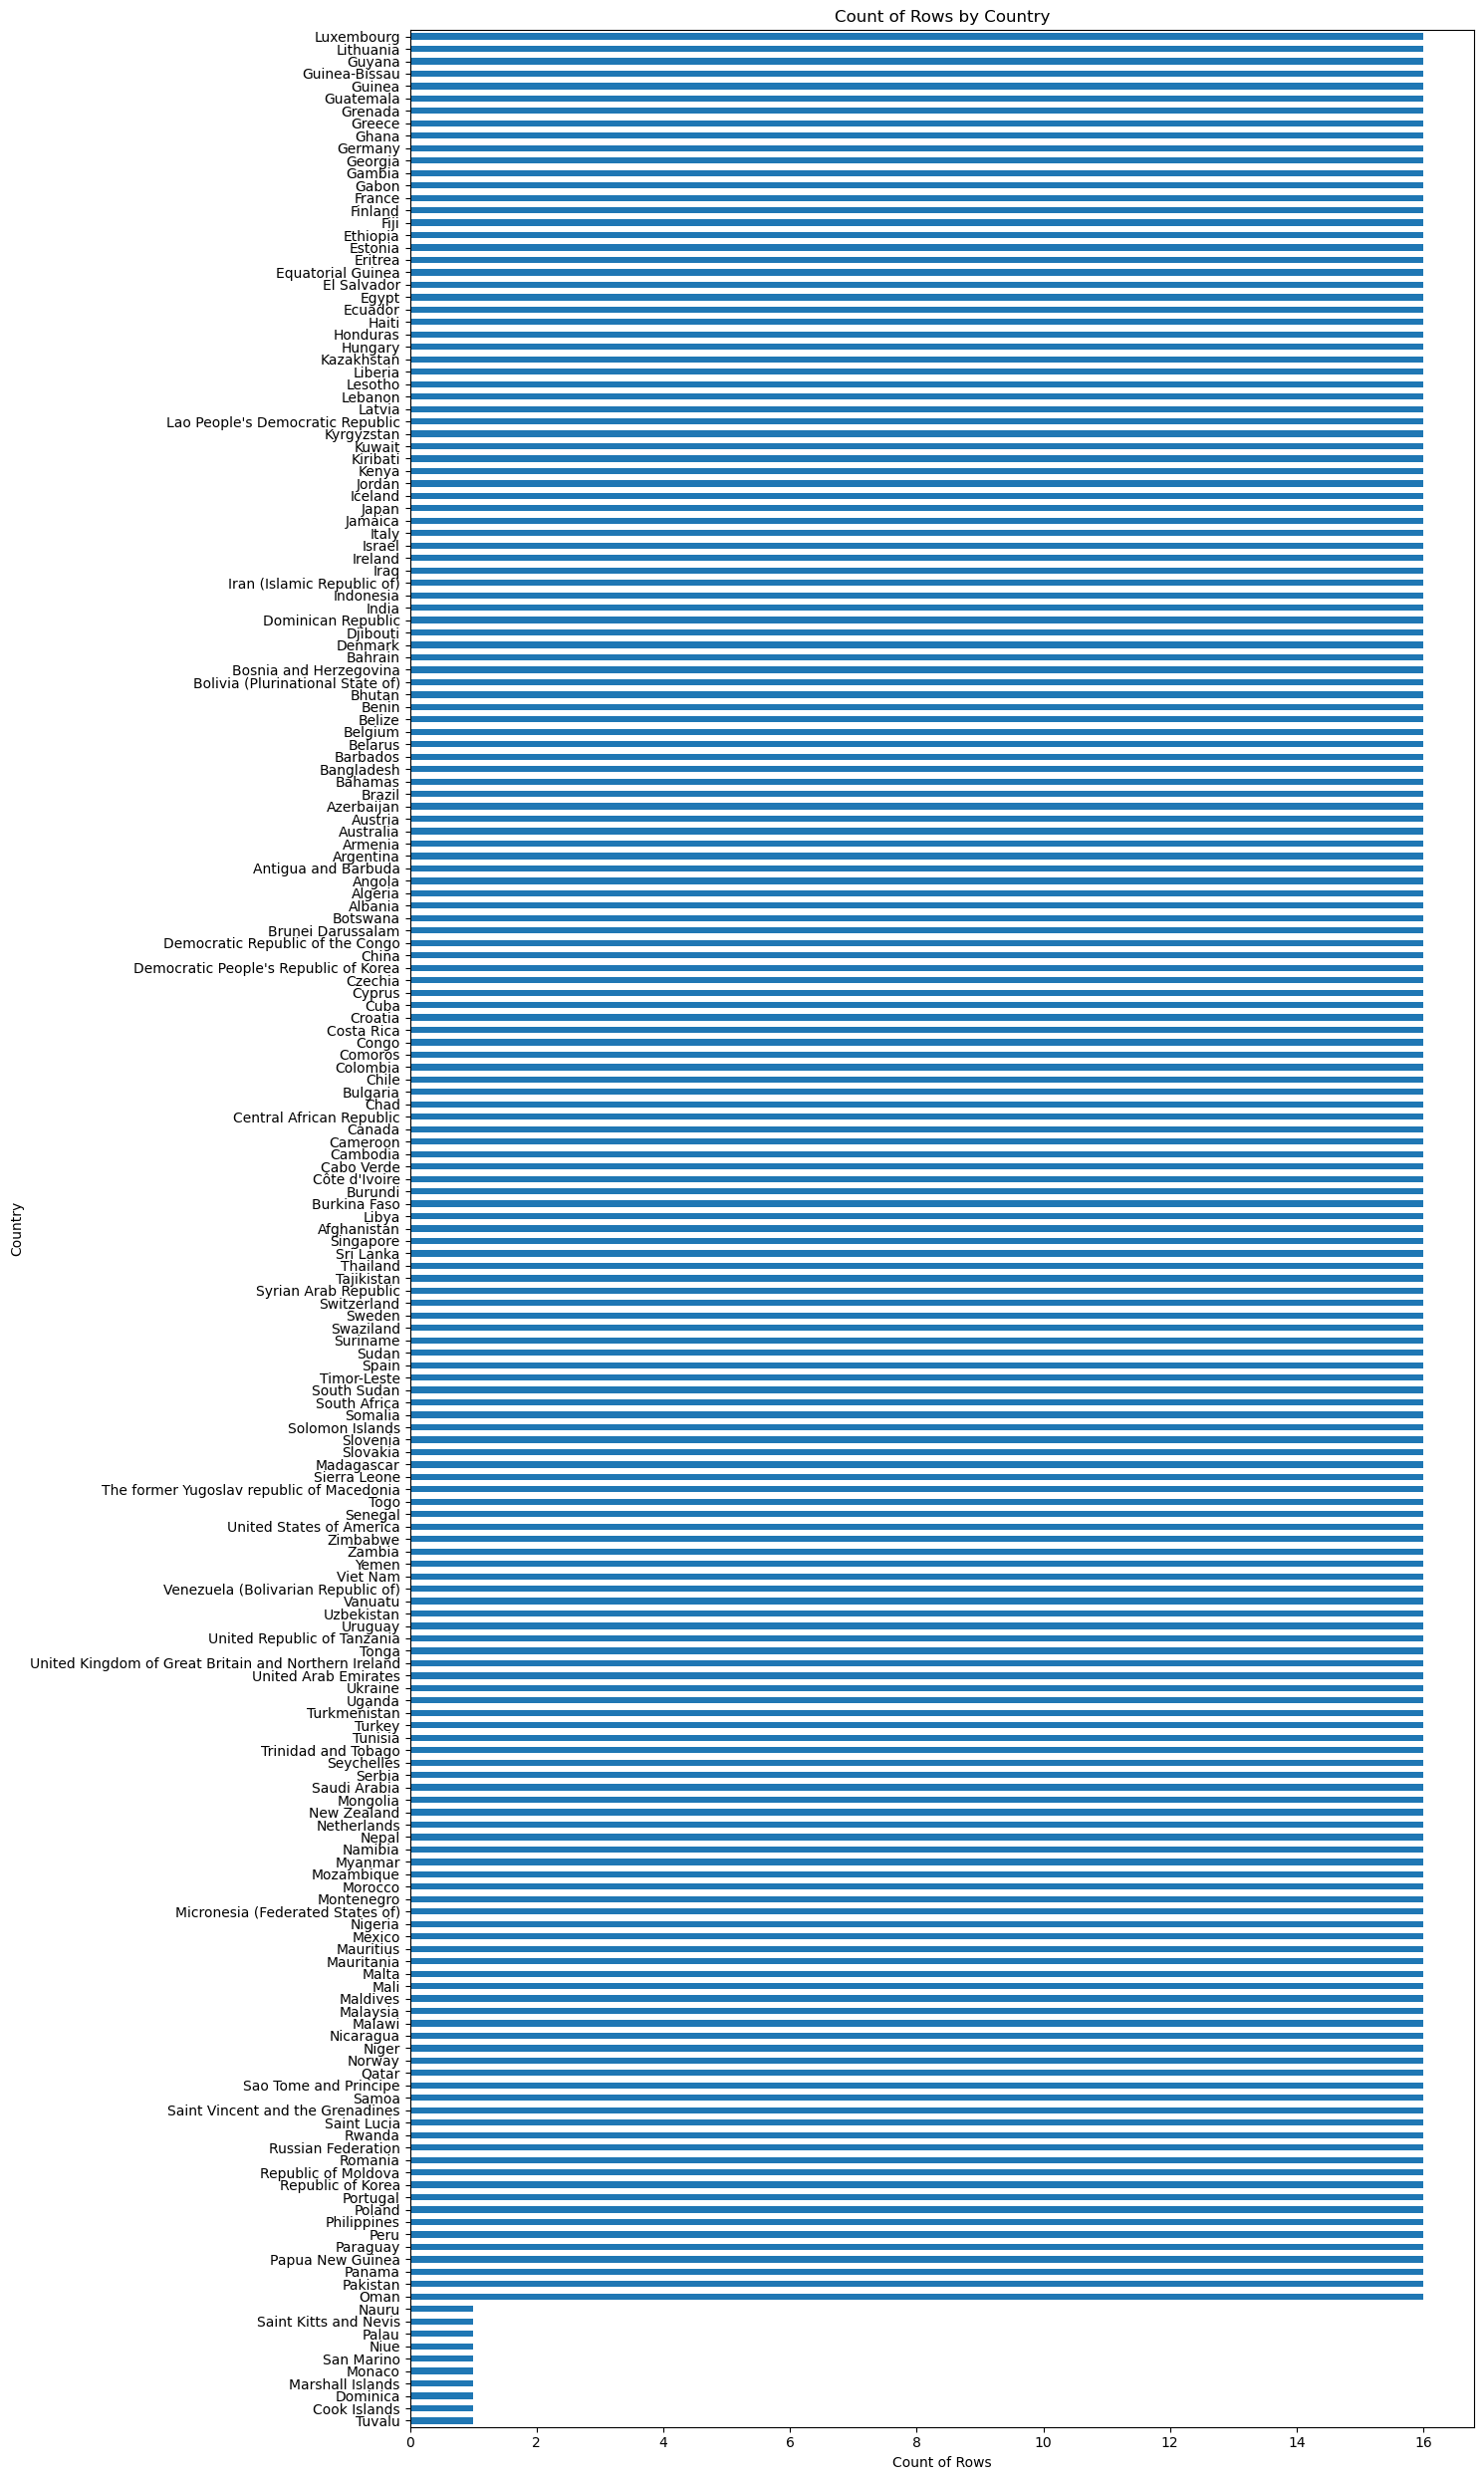

In [52]:
plt.figure(figsize=(15, 25))
wins_df.country.value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [53]:
# It displays that the mass majority of countries have 16 rows (16 years) worth of data. It is important to know mostly
# to make sure that certain countries are not being overrepresented.

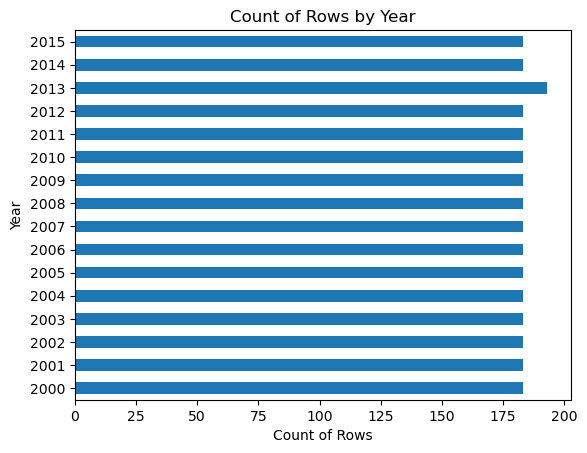

In [54]:
wins_df.year.value_counts().sort_index().plot(kind='barh')
plt.title('Count of Rows by Year')
plt.xlabel('Count of Rows')
plt.ylabel('Year')
plt.show()

In [55]:
# This displays that each year has the same amount of rows, except for 2013, which contains 10 more rows than the rest
# (the countries with only one row from the prior graph's data must be from 2013 alone). This shouldn't have a detrimental
# effect on analysis.

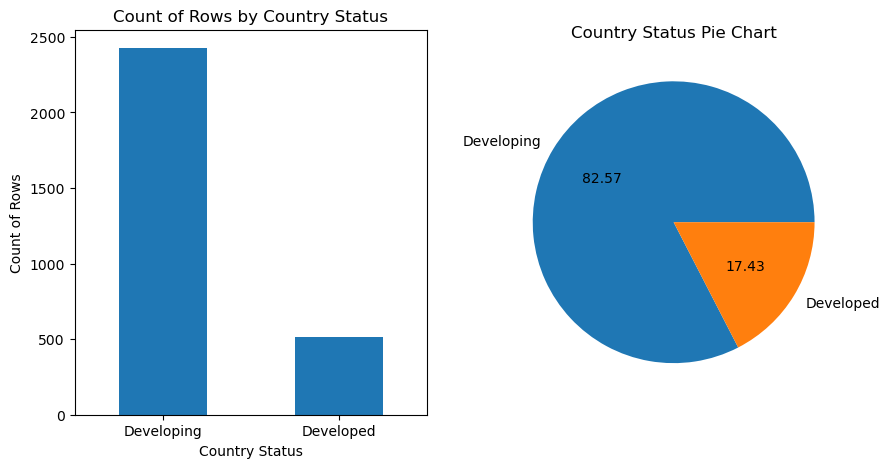

In [56]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
wins_df.status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
wins_df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

In [57]:
# The above displays that the majority of our data comes from countries listed as 'Developing' - 82.57% to be exact.
# It is likely that any model used will more accurately depict results for 'Developing' countries over
#'Developed' countries. as the majority of the data lies within countries that are 'Developing' rather than 'Developed'.

In [58]:
# Let's see the correlation matrix to observe the correlation between continuous variables compared to the life expectancy (target variable) and to one
# another

In [59]:
wins_df[cont_vars].corr()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,1.000000,-0.677680,-0.222292,0.395089,0.488440,0.315120,-0.337887,-0.298626,0.573291,0.222306,0.578952,-0.796939,0.501011,0.011363,-0.514966,-0.512694,0.792878,0.742306
adult_mortality,-0.677680,1.000000,0.119906,-0.187971,-0.293870,-0.214673,0.216200,0.168908,-0.348198,-0.121052,-0.351136,0.596271,-0.297774,-0.000562,0.332904,0.339266,-0.511340,-0.450785
infant_deaths,-0.222292,0.119906,1.000000,-0.062119,-0.094053,-0.196145,0.323610,0.966996,-0.217511,-0.086289,-0.225997,0.124310,-0.059337,0.176352,0.196669,0.202573,-0.178389,-0.191062
alcohol,0.395089,-0.187971,-0.062119,1.000000,0.378069,0.106352,-0.197193,-0.104954,0.265830,0.308434,0.272948,-0.193443,0.389598,-0.036283,-0.436755,-0.427166,0.475112,0.519757
percentage_expenditure,0.488440,-0.293870,-0.094053,0.378069,1.000000,0.122870,-0.194687,-0.131361,0.268385,0.159830,0.268411,-0.295791,0.712940,-0.070366,-0.331693,-0.333748,0.556006,0.530422
hepatitis_b,0.315120,-0.214673,-0.196145,0.106352,0.122870,1.000000,-0.266487,-0.239049,0.608008,0.071100,0.647198,-0.278977,0.172066,-0.004936,-0.134103,-0.139528,0.299493,0.290399
measles,-0.337887,0.216200,0.323610,-0.197193,-0.194687,-0.266487,1.000000,0.368517,-0.320104,-0.161737,-0.315164,0.226305,-0.183792,0.222488,0.359571,0.364201,-0.274976,-0.329274
under-five_deaths,-0.298626,0.168908,0.966996,-0.104954,-0.131361,-0.239049,0.368517,1.000000,-0.281667,-0.096826,-0.291057,0.198160,-0.102372,0.180288,0.235471,0.236927,-0.253539,-0.264996
polio,0.573291,-0.348198,-0.217511,0.265830,0.268385,0.608008,-0.320104,-0.281667,1.000000,0.164149,0.855849,-0.475611,0.309033,0.003618,-0.288660,-0.287206,0.515361,0.509788
total_expenditure,0.222306,-0.121052,-0.086289,0.308434,0.159830,0.071100,-0.161737,-0.096826,0.164149,1.000000,0.176715,-0.110629,0.146954,-0.105257,-0.285700,-0.294560,0.185535,0.259746


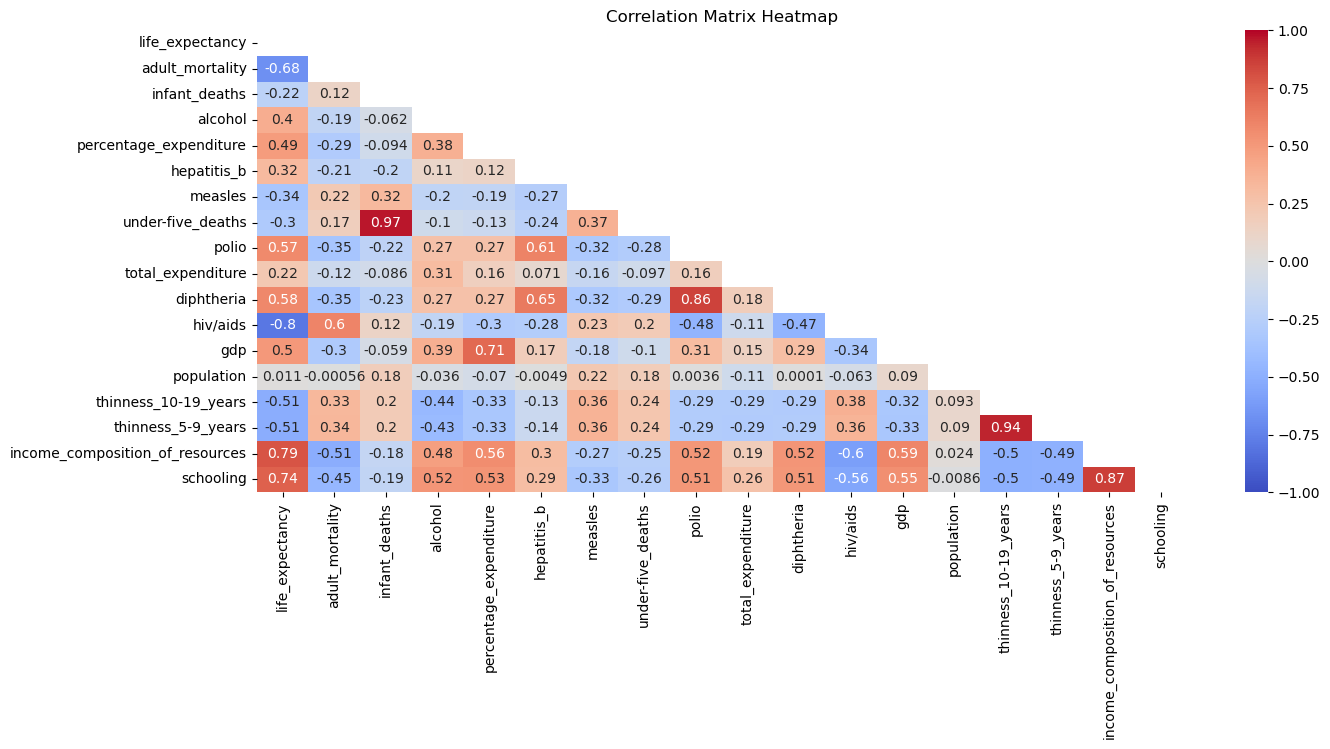

In [60]:
mask = np.triu(wins_df[cont_vars].corr())
plt.figure(figsize=(15,6))
sns.heatmap(wins_df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [61]:
# Some general observations from the graphic above:

# Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:
    # Adult Mortality (negative)
    # HIV/AIDS (negative)
    # Income Composition of Resources (positive)
    # Schooling (positive)
# Life expectancy (target variable) is extremely lowly correlated to population (nearly no correlation at all)

# Infant deaths and Under Five deaths are extremely highly correlated

# Percentage Expenditure and GDP are relatively highly correlated

# Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates

# Polio vaccine rate and Diphtheria vaccine rate are very positively correlated

# HIV/AIDS is relatively negatively correlated with Income Composition of Resources

# Thinness of 5-9 Year olds rate and Thinness of 10-15 Year olds rate is extremely highly correlated

# Income Composition of Resources and Schooling are very highly correlated

In [62]:
# As a note:
# After combining/removing variables that are very highly or extremely highly correlated with one another as well as
# variables that are very lowly correlated with one another, the best course of action may be to perform dimensionality
# reduction using PCA in the feature engineering stage.

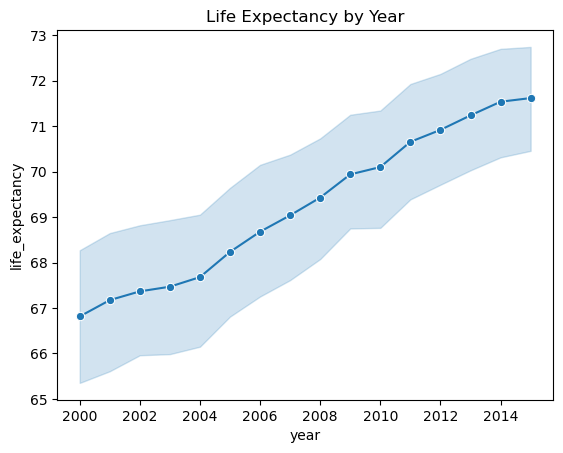

In [63]:
# Categorical to Life Expectancy Comparison

sns.lineplot(x='year', y='life_expectancy', data=wins_df, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

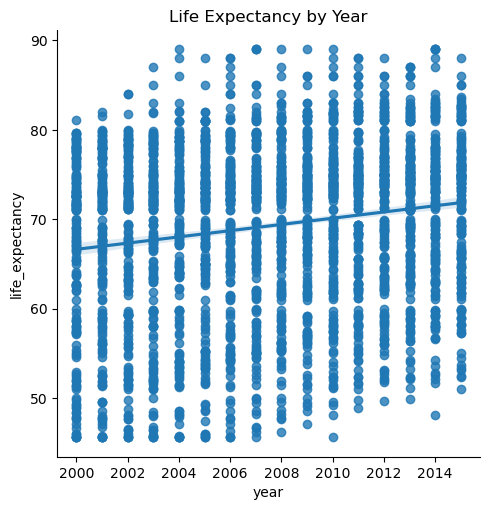

In [64]:
sns.lmplot(x = 'year', y = 'life_expectancy', data = wins_df)
plt.title('Life Expectancy by Year')
plt.show()

In [65]:
# There appears to definitely be a positive trend over time.

In [66]:
wins_df.year.corr(wins_df.life_expectancy)

0.16979644964459023

In [67]:
# There definitely appears to be a correlation, but are the differences between the years significant enough to be
# considered different? A t-test comparison will be used to find out.

In [68]:
years = list(wins_df.year.unique())
years.sort()

In [69]:
yearly_le = {}
for year in years:
    year_data = wins_df[wins_df.year == year].life_expectancy
    yearly_le[year] = year_data

In [70]:
for year in years[:-1]:
    print(10*'-' + str(year) + ' to ' + str(year+1) + 10*'-')
    print(stats.ttest_ind(yearly_le[year], yearly_le[year+1], equal_var=False))

----------2000 to 2001----------
TtestResult(statistic=-0.339874273786677, pvalue=0.734147249286317, df=363.98663436040533)
----------2001 to 2002----------
TtestResult(statistic=-0.18288775743069652, pvalue=0.8549879128960569, df=363.9882604620108)
----------2002 to 2003----------
TtestResult(statistic=-0.09788073999943862, pvalue=0.922080868750695, df=363.9991126846104)
----------2003 to 2004----------
TtestResult(statistic=-0.20076791323205204, pvalue=0.8409921852108723, df=363.99993236234945)
----------2004 to 2005----------
TtestResult(statistic=-0.5360239830703207, pvalue=0.5922696887371386, df=363.6424169927271)
----------2005 to 2006----------
TtestResult(statistic=-0.43512464639644277, pvalue=0.6637298353979988, df=363.9904788724197)
----------2006 to 2007----------
TtestResult(statistic=-0.35499521065847695, pvalue=0.7227988446996725, df=363.8791483489816)
----------2007 to 2008----------
TtestResult(statistic=-0.39657900568183463, pvalue=0.6919107746155075, df=363.3042534056

In [71]:
# Based on the p value of above t-tests, year to year the differences between Life Expectancy do not appear to be
# significant.

# p-value is the likelihood of finding a mean difference by chance if indeed there is no difference in the population.
# If the p-value is less than 0.05, it is judged as “statistically significant,” and if the p-value is greater than 0.05, it is judged
# as “ statistically not significant.”

In [72]:
# Let's analyse the other catergorical variable 'Status.'

In [73]:
wins_df.groupby('status').life_expectancy.agg(['mean'])

,mean
status,
Developed,79.197852
Developing,67.149077


In [74]:
# It appears that 'Developed' countries have a much higher average Life Expectancy. But similar to the year comparisons
# above, is this difference significant? Again, a t-test comparison will be used to find out.

In [75]:
developed_le = wins_df[wins_df.status == 'Developed'].life_expectancy
developing_le = wins_df[wins_df.status == 'Developing'].life_expectancy
stats.ttest_ind(developed_le, developing_le, equal_var=False)

TtestResult(statistic=47.96440581661328, pvalue=2e-323, df=1786.0691515042445)

In [76]:
# Based on the result of the above t-test, there appears to be a very significant difference between 'Developing' and
# 'Developed' countries with respect to their Life Expectancy.

In [77]:
# Since this is the case, a comparison between the status variable and all other continuous variables should be made
# before moving to the feature engineering phase.

In [78]:
# Status Variable Compared to other Continuous Variables

# Since the status variable only contains two different values, it is likely best to compare a number of descriptive
# statistics for those two values with respect to all the other continuous variables.

In [79]:
wins_df_cols = list(wins_df.columns)
interested_vars = [wins_df_cols[2]]
for col in wins_df_cols[4:]:
    interested_vars.append(col)

In [80]:
wins_df[interested_vars].groupby('status').agg('mean')

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
status,,,,,,,,,,,,,,,,,
Developed,96.516154,27.956075,9.578444,633.176176,86.930131,127.019531,34.917279,94.324219,7.399336,94.316406,0.100000,10145.447190,6.406971e+06,1.320703,1.29668,0.831395,15.462831
Developing,184.529133,28.744767,3.598565,207.281125,82.983525,240.460429,39.426329,83.655458,5.670997,83.602464,0.617106,3955.176138,7.740814e+06,5.417248,5.44305,0.600405,11.329580


In [81]:
# From the above, it appears that many of these values are likely correlated to whether a country is 'Developed' or
# 'Developing'. Again, t-tests are the best way to find out if differences are significant here.

In [82]:
developed_df = wins_df[wins_df.status == 'Developed']
developing_df = wins_df[wins_df.status == 'Developing']
for col in interested_vars[1:]:
    print(5*'-' + str(col) + ' Developed/Developing t-test comparison' + 5*'-')
    print('p-value=' +str(stats.ttest_ind(developed_df[col], developing_df[col], equal_var=False)[1]))

-----adult_mortality Developed/Developing t-test comparison-----
p-value=3.295961777162642e-145
-----infant_deaths Developed/Developing t-test comparison-----
p-value=0.43706003820584804
-----alcohol Developed/Developing t-test comparison-----
p-value=7.259688493240182e-204
-----percentage_expenditure Developed/Developing t-test comparison-----
p-value=1.0654031797381314e-67
-----hepatitis_b Developed/Developing t-test comparison-----
p-value=2.723238539034132e-12
-----measles Developed/Developing t-test comparison-----
p-value=2.938258449568791e-18
-----under-five_deaths Developed/Developing t-test comparison-----
p-value=0.0018370073332902765
-----polio Developed/Developing t-test comparison-----
p-value=3.1739264406706406e-118
-----total_expenditure Developed/Developing t-test comparison-----
p-value=1.120285529447061e-39
-----diphtheria Developed/Developing t-test comparison-----
p-value=3.0189459362754654e-109
-----hiv/aids Developed/Developing t-test comparison-----
p-value=1.730

C:\Users\balko\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [83]:
# From the above, it is plain to see that there is a significant difference between the following variables with respect to a country's status:

# Adult Mortality
# Alcohol
# Percentage Expenditure
# Hepatitis B
# Measles
# Under Five Deaths
# Polio
# Total Expenditure
# Diphtheria
# HIV/AIDS
# GDP
# Population
# Thinness of 10 to 19 Year Olds
# Thinness of 5 to 9 Year Olds
# Income Composition of Resources
# Schooling

In [84]:
# This implies that the status of a country is likely highly correlated to the above variables - also from earlier,
# it is significant in the difference between Life Expectancy as well. This variable should likely be included in our
# features in the next section.

### Section 4: Feature Engineering

In [86]:
# Since it is apparent that the status of a country should be included in some way in the final features of the data,
# one hot encoding will be conducted in order to include it in the future model.

In [87]:
feat_df = wins_df.join(pd.get_dummies(wins_df.status)).drop(columns='status').copy()
feat_df.iloc[:, 2:].corr().iloc[:, -2:].T

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,Developed,Developing
Developed,0.483121,-0.310207,-0.011644,0.580249,0.420621,0.108121,-0.130744,-0.045339,0.265064,0.284829,0.267119,-0.290242,0.434245,-0.058526,-0.395916,-0.396833,0.51065,0.508211,1.0,-1.0
Developing,-0.483121,0.310207,0.011644,-0.580249,-0.420621,-0.108121,0.130744,0.045339,-0.265064,-0.284829,-0.267119,0.290242,-0.434245,0.058526,0.395916,0.396833,-0.51065,-0.508211,-1.0,1.0


In [88]:
# From the above it can be observed that whether a country is 'Developed' or not is certainly correlated with a number
# of variables, but not extremely highly. However, it does have a very low correlation with Infant Deaths, Under Five
# Deaths and Population.

In [89]:
# Next, the categorical columns, 'year' and 'country' will be dropped as they don't have significant differences among
# life expectancy.

In [90]:
feat_df.drop(columns=['country', 'year'], inplace=True)

In [91]:
# From the prior analysis, there are a number of variables that are very or extremely highly correlated with one another.
# In those cases, the variable which is most highly correlated to Life Expectancy (target variable) will be kept while the
# others will be dismissed.

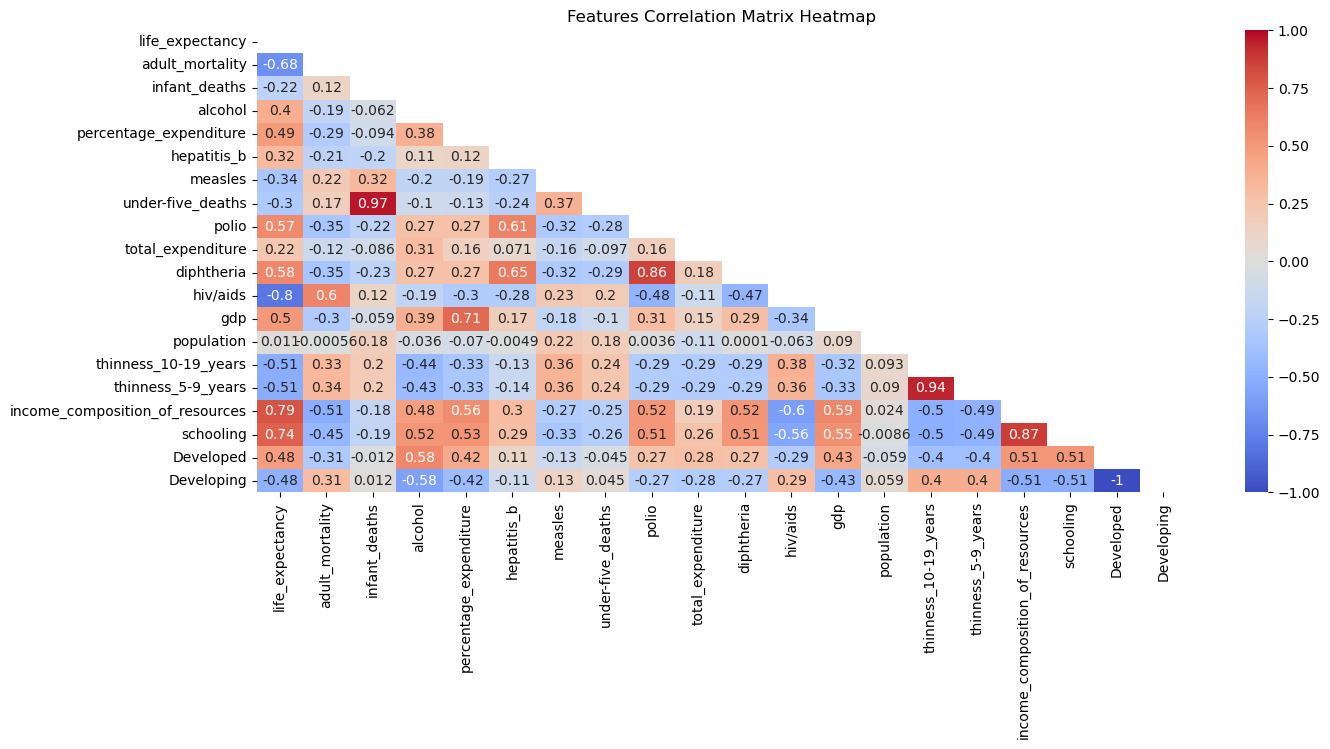

In [92]:
def feat_heatmap():
    mask = np.triu(feat_df.corr())
    plt.figure(figsize=(15,6))
    sns.heatmap(feat_df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(len(feat_df.columns), 0)
    plt.title('Features Correlation Matrix Heatmap')
    plt.show()
feat_heatmap()

In [93]:
# The following are very/extremely highly correlated (correlation > .7 or correlation < -.7):

# Infant Deaths/Under Five Deaths (drop Infant Deaths - Under Five Deaths is more highly correlated to Life Expectancy)

# GDP/Percentage Expenditure (drop Percentage Expenditure - GDP is more higher correlated to Life Expectancy)

# Polio/Diphtheria (drop Polio - Diphtheria is more highly correlated to Life Expectancy)

# Thinness 5-9/Thinness 10-19 (drop Thinness 10-19 as correlations to other variables are slightly higher)

# Income Composition of Resources/Schooling (drop Schooling - Income Composition of Resources is more highly correlated
# with Life Expectancy)

# Developing/Developed (drop Developing - these two are the same just opposite of one another)

In [94]:
feat_df.drop(columns=['infant_deaths', 'percentage_expenditure','polio','thinness_10-19_years','schooling','Developing'], inplace=True)

In [95]:
# In addition to the above variables, it may also be useful to drop variables which are not very correlated with any
# of the other variables, the only variable where that is the case is 'Population'.

In [96]:
feat_df.drop(columns=['population'], inplace=True)

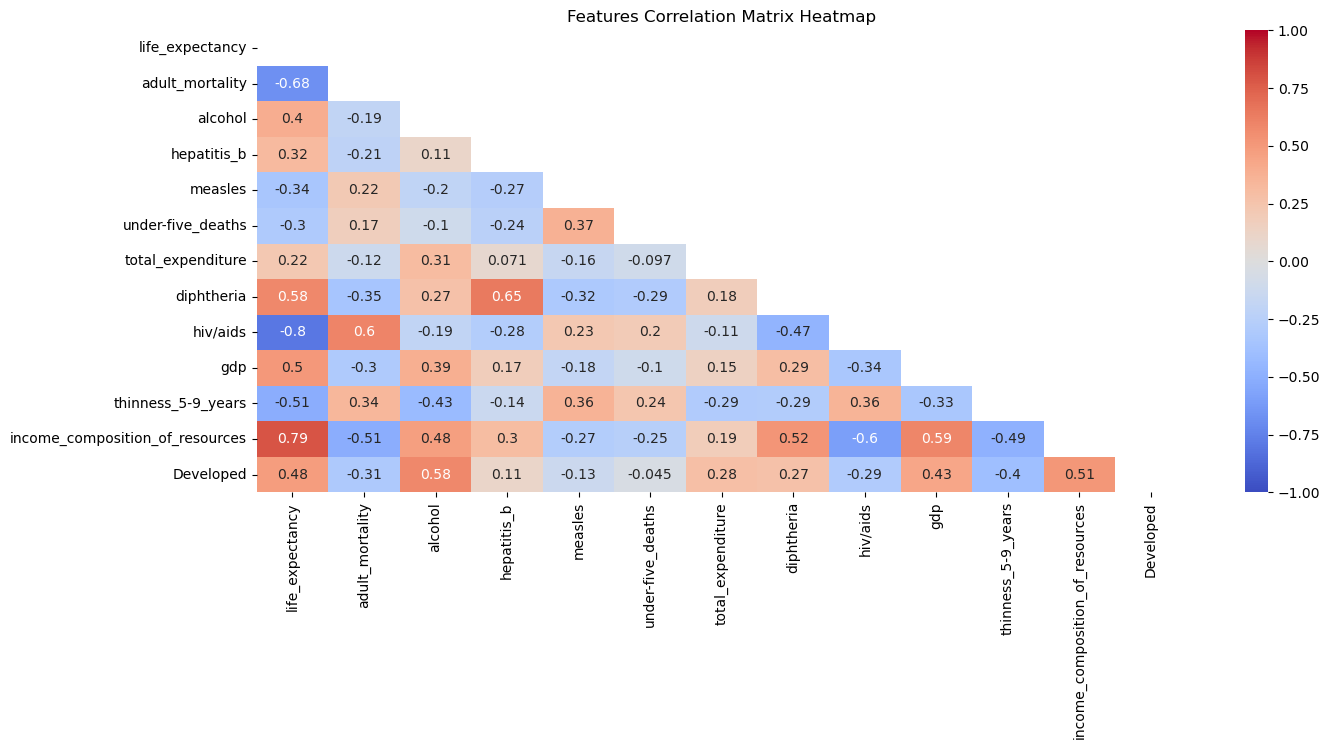

In [97]:
feat_heatmap()

In [98]:
# It may be useful to run a Principal Components Analysis (PCA) on this data to reduce the amount of dimensions (features).
# But there are a number of assumptions/requirements when it comes to PCA:

# Continuous data: the data used should be of a continuous type
# Sample size: the sample size should have between 5-10 samples per feature
# Normalized data: the data is generally normally distributed
# Correlation: there should be correlation between the features
# Linearity: it is assumed that relationships between features are linear
# Outliers: PCA is sensitive to outliers, therefore outliers should not be present

In [99]:
# The features set currently satisfies 3 of the above assumptions: sample size, correlation, outliers. The linearity
# assumption may not be true, the data is not currently normalized and not all the data is continuous - the developed
# indicator is categorical. First the 'Developed' variable should be removed.

In [100]:
pca_df = feat_df.drop(columns='Developed').copy()

In [101]:
# PCA is an unsupervised technique so the target variable is not needed and can be dropped.

In [102]:
pca_df.drop(columns='life_expectancy', inplace=True)

In [103]:
len(pca_df.columns)

11

In [104]:
X = scale(pca_df)
sklearn_pca = PCA()
Y = sklearn_pca.fit_transform(X)
print('Explained variance by Principal Components:', sklearn_pca.explained_variance_ratio_)
print('Eigenvalues:', sklearn_pca.explained_variance_)

Explained variance by Principal Components: [0.36685507 0.12232886 0.10672368 0.08538371 0.07439446 0.05833868
 0.05266908 0.04432076 0.03761047 0.02699705 0.02437817]
Eigenvalues: [4.03677981 1.34607566 1.17436016 0.93954064 0.81861773 0.64194395
 0.57955711 0.48769433 0.41385604 0.29706869 0.26825119]


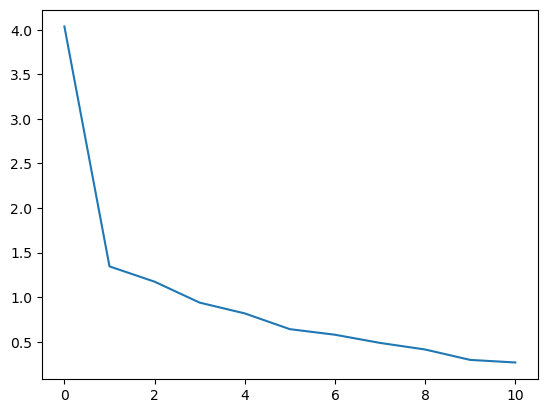

PC1 Explained Variance: 36.69%


In [105]:
plt.plot(sklearn_pca.explained_variance_)
plt.show()
print('PC1 Explained Variance:', str(round(sklearn_pca.explained_variance_ratio_[0]*100, 2))+'%')

In [106]:
# This tells us that PC1 variables are kept for modeling, but it accounts for 36.69% of the total variance of the
# variables. It is better we start with more variables and decided that we start modeling using the features prior to
# the PCA method.

In [107]:
feat_df.columns

Index(['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b',
       'measles', 'under-five_deaths', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness_5-9_years',
       'income_composition_of_resources', 'Developed'],
      dtype='object')

In [108]:
# Those features are as follows:

# Adult Mortality
# Alcohol
# Hepatitis B
# Measles
# Under-Five Deaths
# Total Expenditure
# Diphtheria
# HIV/AIDS
# GDP
# Thinness 5-9 Years
# Income Composition Of Resources
# Developed

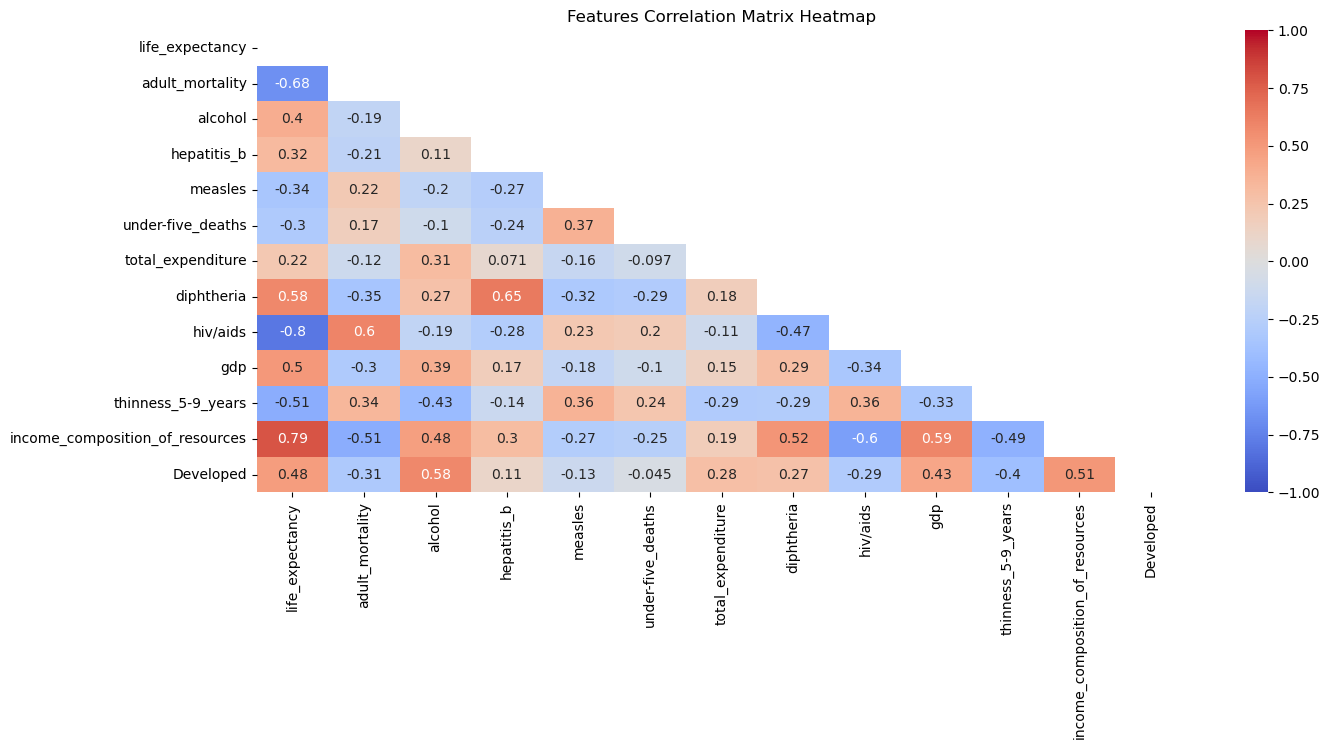

In [109]:
feat_heatmap()

In [110]:
# All of the above variables contain a seemingly meaningful correlation to the target variable (Life Expectancy) while
# also not being overly correlated with one another.

In [111]:
feat_df.head(10)

,life_expectancy,adult_mortality,alcohol,hepatitis_b,measles,under-five_deaths,total_expenditure,diphtheria,hiv/aids,gdp,thinness_5-9_years,income_composition_of_resources,Developed
0,65.0,263.0,0.010000,65.0,831,83.000000,8.16,65.0,0.1,584.259210,15.5,0.479,False
16,77.8,74.0,4.600000,99.0,0,44.844961,6.00,99.0,0.1,3954.227830,1.3,0.762,False
32,75.6,19.0,5.288333,95.0,63,24.000000,7.08,95.0,0.1,4132.762920,5.8,0.743,False
48,52.4,335.0,5.288333,64.0,118,98.000000,7.08,64.0,1.8,3695.793748,8.2,0.531,False
64,76.4,13.0,5.288333,99.0,0,44.844961,7.08,99.0,0.2,13566.954100,3.3,0.784,False
80,76.3,116.0,5.288333,94.0,0,9.000000,7.08,94.0,0.1,13467.123600,0.9,0.826,False
96,74.8,118.0,5.288333,94.0,33,1.000000,7.08,94.0,0.1,369.654776,2.2,0.741,False
112,82.8,59.0,5.288333,93.0,74,1.000000,7.08,93.0,0.1,16784.346160,0.6,0.937,True
128,81.5,65.0,5.288333,93.0,309,44.844961,7.08,93.0,0.1,16784.346160,2.1,0.892,True
144,72.7,118.0,5.288333,96.0,0,6.000000,7.08,96.0,0.1,55.313820,2.9,0.758,False


**Section 5: Data Modeling**

In [113]:
features = ['adult_mortality', 'alcohol', 'hepatitis_b', 'measles',
            'under-five_deaths', 'total_expenditure', 'diphtheria',
            'hiv/aids', 'gdp', 'thinness_5-9_years',
            'income_composition_of_resources', 'Developed']
target = 'life_expectancy'

In [114]:
# Randomly split the data into train and test sets
X = feat_df[features]
y = feat_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [116]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [118]:
y_pred_lr = lr_model.predict(X_test_scaled)


In [119]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [120]:
print(f"Linear Regression - Mean Squared Error: {mse_lr}, R2 Score: {r2_lr}")

Linear Regression - Mean Squared Error: 14.22986914564065, R2 Score: 0.8443376126092027


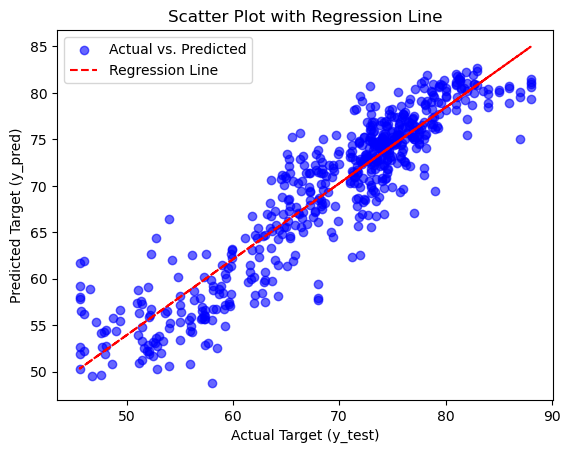

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test (actual target) and y_pred (predicted target)
# Replace these with your actual data
y_test = y_test
y_pred = y_pred_lr

# Create the scatter plot
plt.scatter(y_test, y_pred, label='Actual vs. Predicted',color='blue', alpha=0.6)

# Fit a linear regression line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Regression Line', linestyle='--')

plt.xlabel('Actual Target (y_test)')
plt.ylabel('Predicted Target (y_pred)')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()

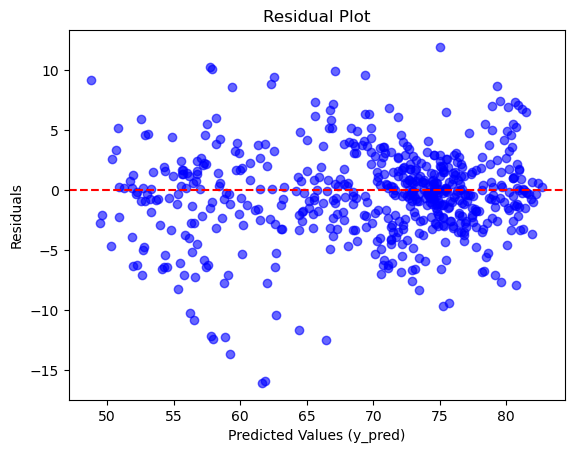

Mean of Residuals: -0.3828
Standard Deviation of Residuals: 3.7528
Skewness of Residuals: -0.3860
Kurtosis of Residuals: 4.7733
Residuals do not follow a normal distribution (p < 0.05).


In [122]:
import numpy as np
import matplotlib.pyplot as plt

residuals = y_test - y_pred_lr

# Analyze residuals:
# 1. Residual Plot
plt.scatter(y_pred_lr, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 2. Summary Statistics
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
skewness = np.mean((residuals - mean_residuals) ** 3) / std_residuals ** 3
kurtosis = np.mean((residuals - mean_residuals) ** 4) / std_residuals ** 4

print(f"Mean of Residuals: {mean_residuals:.4f}")
print(f"Standard Deviation of Residuals: {std_residuals:.4f}")
print(f"Skewness of Residuals: {skewness:.4f}")
print(f"Kurtosis of Residuals: {kurtosis:.4f}")

# 3. Normality Check
from scipy.stats import shapiro
_, p_value = shapiro(residuals)
if p_value > 0.05:
    print("Residuals appear approximately normally distributed.")
else:
    print("Residuals do not follow a normal distribution (p < 0.05).")

Random Forest

In [124]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [125]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [126]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [127]:
print(f"Random Forest - Mean Squared Error: {mse_rf}, R2 Score: {r2_rf}")

Random Forest - Mean Squared Error: 3.8949723618449834, R2 Score: 0.9573923912819884


Gradient Boosting

In [129]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [130]:
y_pred_gb = gb_model.predict(X_test_scaled)

In [131]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [132]:
print(f"Gradient Boosting - Mean Squared Error: {mse_gb}, R2 Score: {r2_gb}")

Gradient Boosting - Mean Squared Error: 5.970409676792754, R2 Score: 0.934688912843911


**Model Performance Comparison**

Linear Regression:
Mean Squared Error (MSE): 14.230
R2 Score: 0.844

Random Forest:
Mean Squared Error (MSE): 3.895
R2 Score: 0.957

Gradient Boosting:
Mean Squared Error (MSE): 5.970
R2 Score: 0.934

*   Random Forest performs the best in terms of both MSE and R2 Score among the
models evaluated. It has the lowest MSE and the highest R2 Score, indicating it provides the most accurate predictions and explains the most variance in the target variable.

*   Gradient Boosting also performs well, with an MSE higher than Random Forest but lower than Linear Regression, and an R2 Score slightly lower than Random Forest but better than Linear Regression.

*   Linear Regression has the highest MSE and the lowest R2 Score, suggesting it may not capture the complexity of the data as well as the ensemble methods.

*   Based on these results, Random Forest would be the preferred model for predicting life expectancy given its superior performance in this case.


**Hyperparameter Tuning (Random Forest)**

In [135]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [136]:
rf_model = RandomForestRegressor(random_state=42)


In [137]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [138]:
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\balko\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [139]:
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [140]:
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

In [141]:
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

In [142]:
print(f"Best Random Forest - Mean Squared Error: {mse_best_rf}, R2 Score: {r2_best_rf}")

Best Random Forest - Mean Squared Error: 3.814610064466678, R2 Score: 0.9582714848940297


Based on the GridSearch results for your Random Forest model, here's a summary:

*   Mean Squared Error (MSE): 3.815
This metric measures the average squared difference between the predicted and actual values. Lower values indicate better model performance. In this case, an MSE of 3.815 suggests a low level of error in predictions.

*   R² Score: 0.958
The R² score represents the proportion of variance in the dependent variable that is predictable from the independent variables. An R² score of 0.958 means that approximately 95.8% of the variance in the target variable is explained by the model, which is a really good fit.

**Best Parameters:**

*   max_depth: None
The depth of the tree is not constrained, allowing the tree to grow until all leaves are pure or contain fewer than min_samples_split samples.

*   max_features: 'auto'
At each split, the model considers a random subset of features, specifically the total number of features, to find the best split.

*   min_samples_leaf: 1
The minimum number of samples required to be at a leaf node is 1. This parameter ensures that leaves have at least one sample.

*   min_samples_split: 2
The minimum number of samples required to split an internal node is 2. This parameter controls the number of samples a node must have before it can be split further.

*   n_estimators: 200
The number of trees in the forest is 300, which usually improves model performance but increases computational cost.

**Transition from Random Split to Year-Based Split for Enhanced Model Evaluation**

Previously, we used a random split to partition our dataset into training and test sets. This approach randomly allocated data points to each set, which ensured that the data was divided without any specific temporal consideration.
However, to improve the relevance and temporal validity of our model evaluation, we have now transitioned to a year-based split. This new approach ensures that all data from the year 2012 and earlier is included in the training set, while data from years after 2012 is reserved for testing. This method better reflects real-world scenarios where we train our models on historical data and evaluate them on more recent data.

In [145]:
feat_df = feat_df.reset_index()
df = df.reset_index()
merged_df = pd.merge(feat_df, df[['index', 'year']], left_on='index', right_on='index')


In [146]:
merged_df

,index,life_expectancy,adult_mortality,alcohol,hepatitis_b,measles,under-five_deaths,total_expenditure,diphtheria,hiv/aids,gdp,thinness_5-9_years,income_composition_of_resources,Developed,year
0,0,65.0,263.0,0.010000,65.000000,831,83.000000,8.16,65.0,0.1,584.259210,15.5,0.479,False,2015
1,16,77.8,74.0,4.600000,99.000000,0,44.844961,6.00,99.0,0.1,3954.227830,1.3,0.762,False,2015
2,32,75.6,19.0,5.288333,95.000000,63,24.000000,7.08,95.0,0.1,4132.762920,5.8,0.743,False,2015
3,48,52.4,335.0,5.288333,64.000000,118,98.000000,7.08,64.0,1.8,3695.793748,8.2,0.531,False,2015
4,64,76.4,13.0,5.288333,99.000000,0,44.844961,7.08,99.0,0.2,13566.954100,3.3,0.784,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2873,72.5,168.0,8.010000,55.000000,22,13.000000,4.91,77.0,0.1,4708.515191,1.7,0.670,False,2000
2934,2889,73.4,139.0,1.600000,74.035294,831,43.000000,4.89,96.0,0.1,4708.515191,15.5,0.569,False,2000
2935,2905,68.0,252.0,0.070000,55.000000,0,66.000000,4.14,74.0,0.1,4708.515191,14.1,0.436,False,2000
2936,2921,45.6,428.0,2.620000,74.035294,831,72.000000,7.16,85.0,1.8,341.955625,7.5,0.418,False,2000


In [147]:
train_df = merged_df[merged_df['year'] <= 2012]
test_df = merged_df[merged_df['year'] > 2012]

In [148]:
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [149]:
# Initialize the Random Forest Regressor with specified parameters
rf = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

In [150]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=10,
                      n_estimators=300, random_state=42)

In [151]:
y_pred = rf.predict(X_test)

In [152]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [153]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 5.69
R² Score: 0.92


**Year-Based Split:**
 Data is split based on a specific criterion, such as the year, where older data (e.g., up to 2012) is used for training and more recent data (e.g., after 2012) is used for testing.

Impact: This method is useful for evaluating the model's performance on more recent, unseen data, making it more realistic for scenarios where future predictions are required based on historical data. It may better reflect how the model performs in real-world applications where temporal trends are significant.

**Comparison of Results Based on Data Splitting:**
- Random Split:
 - MSE: 3.815
 - R² Score: 0.958
 - Implication: This model's performance metrics might reflect a balance across the entire dataset but might not capture temporal shifts or trends effectively.

- Year-Based Split:
  - MSE: 5.69
  - R² Score: 0.92
  - Implication: Although in practice it seems like a good method, this model demonstrates poorer accuracy (lower MSE) as well as a lower R² score, indicating that it may have been less effective in explaining the variance in the data. That being said it still does a good job.


The difference in metrics between the two models highlights the impact of the data splitting method on model performance evaluation. The random split provides a broad view of performance but may miss temporal dynamics, while the year-based split offers insights into how well the model performs on more recent data, which can be crucial for applications involving time-dependent trends.

**Feature importance**

In [156]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [157]:
print(feature_importance_df)

                            Feature  Importance
7                          hiv/aids    0.257329
0                   adult_mortality    0.229782
10  income_composition_of_resources    0.205745
6                        diphtheria    0.073514
9                thinness_5-9_years    0.068676
8                               gdp    0.038299
11                        Developed    0.031573
1                           alcohol    0.030175
4                 under-five_deaths    0.027261
5                 total_expenditure    0.013350
3                           measles    0.012700
2                       hepatitis_b    0.011596




### **Interpretation:**

- **Top Features:**
  - **`hiv/aids` (0.257329)**: This feature is also highly influential, indicating that HIV/AIDS data is significant for the model's predictions.
  - **`adult_mortality` (0.229782)**: This is another major predictor, showing that adult mortality rates have a strong impact on the model’s outputs.
  - **`income_composition_of_resources` (0.205745)**: This feature has the highest importance, suggesting it is a key predictor in your model.

- **Moderate Importance Features:**
  - **`diphtheria` (0.073514)** and **`thinness_5-9_years` (0.068676)** : These features have moderate importance, contributing to the model but not as strongly as the top features.



### **Key Takeaways:**

1. **High Impact Features**: Focus on the top features ( `hiv/aids`,`income_composition_of_resources`,`adult_mortality`) for insights or further analysis, as they significantly influence the model.
2. **Feature Engineering**: Consider refining or exploring interactions between these important features to enhance model performance.
3. **Dimensionality Reduction**: Features with very low importance may be candidates for removal or further scrutiny to simplify the model without significant loss in performance.
